<a href="https://colab.research.google.com/github/youmnanasser/Solar-Power-Analysis-And-Prediction/blob/main/Solar_Power_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import HTML as html_print
from termcolor import colored
from IPython.display import display

import warnings

In [2]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039277 sha256=1cf742952f55864d744de21960d2d554a7ee4f74a4f3067daa0e9117a4f0b73a
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


# Connect to Google Drive

In [3]:
from google.colab import drive, files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Datasets

In [5]:
df_1_Generation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Plant_1_Generation_Data.csv")
df_1_Weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Plant_1_Weather_Sensor_Data.csv")

# Exploratory Data Analaysis

### Basic Exploration

In [6]:

def display_head_and_tail(dataframe, head=5):
  display(dataframe.head(head).style.set_caption("Head"))
  display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
  na_df = dataframe.isnull().sum().reset_index()
  na_df.columns = ['Column', 'Number of NA']
  display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
  quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
  display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def display_column_types(dataframe):
  # Get the data types of each column
  column_types = dataframe.dtypes
  print("Data types of each column:")
  print(column_types)

def display_min_max_values_of_columns(dataframe):
  max_values = dataframe.max(axis=0)
  print("Maximum values for each column:")
  print(max_values)
  min_values = dataframe.min(axis=0)
  print("Minimum values for each column:")
  print(min_values)

def check_df(dataframe, head=5):
  print('Shape')
  print(dataframe.shape)
  print('Types')
  display_column_types(dataframe)
  print('Head & Tail')
  display_head_and_tail(dataframe, head)
  print('NA Values')
  display_na(dataframe)
  display_min_max_values_of_columns(dataframe)

In [7]:
check_df(df_1_Weather)

Shape
(3182, 6)
Types
Data types of each column:
DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object
Head & Tail


NA Values


Maximum values for each column:
DATE_TIME              2020-06-17 23:45:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              35.252486
MODULE_TEMPERATURE               65.545714
IRRADIATION                       1.221652
dtype: object
Minimum values for each column:
DATE_TIME              2020-05-15 00:00:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              20.398505
MODULE_TEMPERATURE               18.140415
IRRADIATION                            0.0
dtype: object


In [8]:
df_1_Generation['DATE_TIME'] = pd.to_datetime(df_1_Generation['DATE_TIME'], format='%d-%m-%Y %H:%M')

df_1_Weather['DATE_TIME'] = pd.to_datetime(df_1_Weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

## Plant 1 Analysis

In [ ]:
check_df(df_1_Generation)

Shape
(68778, 7)
Types
Data types of each column:
DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object
Head & Tail


NA Values


Maximum values for each column:
DATE_TIME      2020-06-17 23:45:00
PLANT_ID                   4135001
SOURCE_KEY         zVJPv84UY57bAof
DC_POWER                 14471.125
AC_POWER                   1410.95
DAILY_YIELD                 9163.0
TOTAL_YIELD              7846821.0
dtype: object
Minimum values for each column:
DATE_TIME      2020-05-15 00:00:00
PLANT_ID                   4135001
SOURCE_KEY         1BY6WEcLGh8j5v7
DC_POWER                       0.0
AC_POWER                       0.0
DAILY_YIELD                    0.0
TOTAL_YIELD              6183645.0
dtype: object


In [ ]:
check_df(df_1_Weather)

Shape
(3182, 6)
Types
Data types of each column:
DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object
Head & Tail


NA Values


Maximum values for each column:
DATE_TIME              2020-06-17 23:45:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              35.252486
MODULE_TEMPERATURE               65.545714
IRRADIATION                       1.221652
dtype: object
Minimum values for each column:
DATE_TIME              2020-05-15 00:00:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              20.398505
MODULE_TEMPERATURE               18.140415
IRRADIATION                            0.0
dtype: object


## Generation Analysis

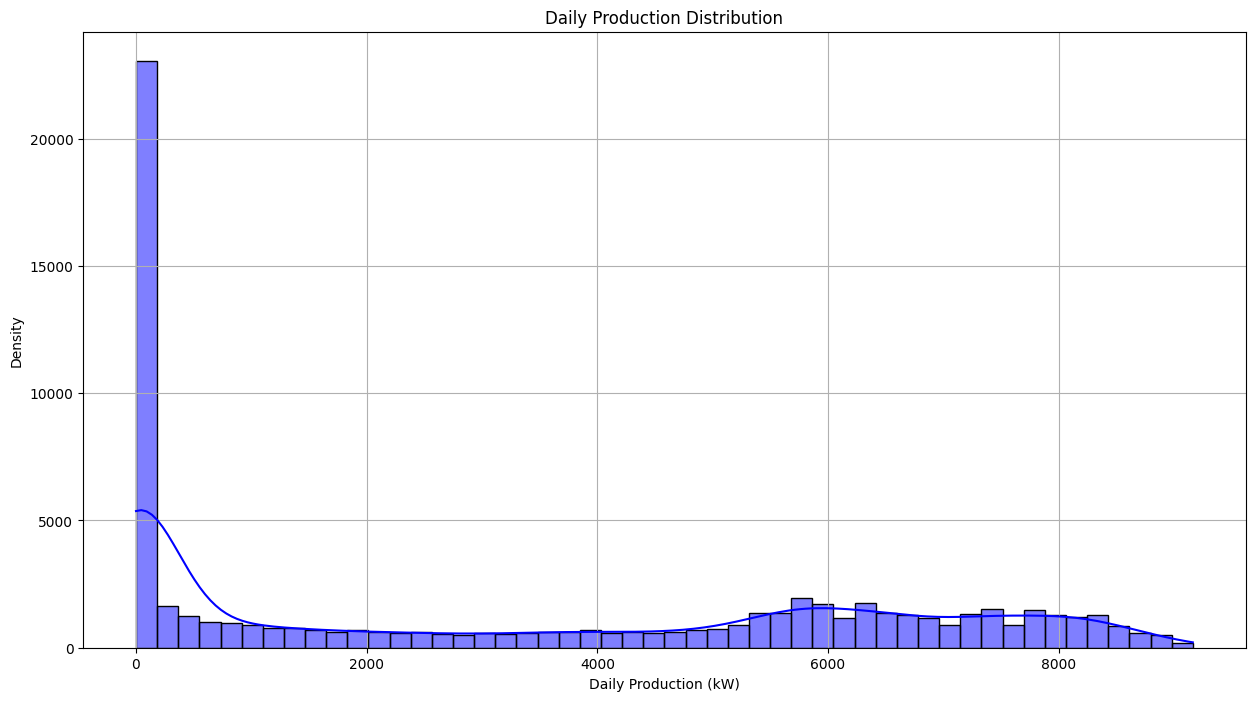

In [11]:
# Daily Production Distribution
plt.figure(figsize=(15,8))
sns.histplot(df_1_Generation['DAILY_YIELD'], bins=50, color='blue', kde=True)
plt.title('Daily Production Distribution')
plt.xlabel('Daily Production (kW)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<ipython-input-12-7794465b65f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_1_Generation['SOURCE_KEY'], y=df_1_Generation['DAILY_YIELD'], palette="Blues")


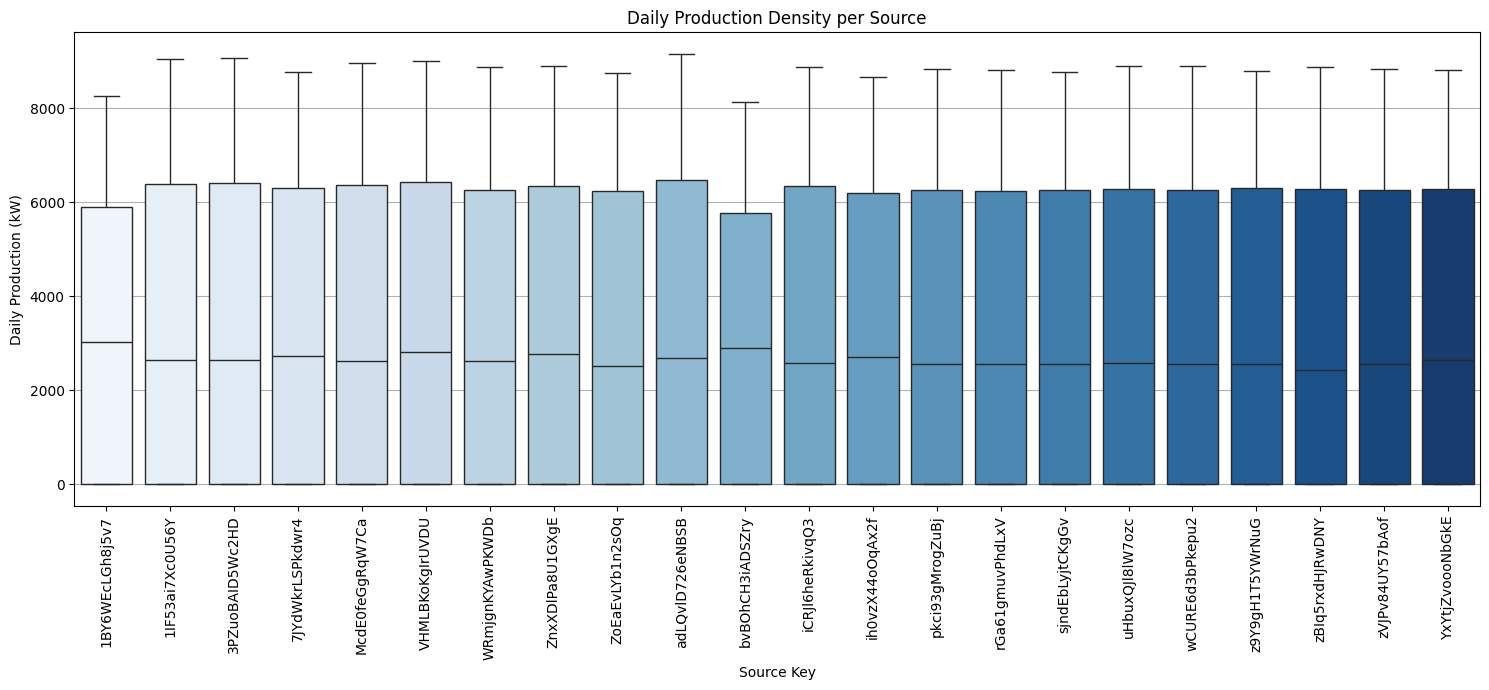

In [12]:
# Daily Production Density per Source
plt.figure(figsize=(15,7))
sns.boxplot(x=df_1_Generation['SOURCE_KEY'], y=df_1_Generation['DAILY_YIELD'], palette="Blues")
plt.xticks(rotation=90)
plt.title('Daily Production Density per Source')
plt.xlabel('Source Key')
plt.ylabel('Daily Production (kW)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [13]:
print("Unique Hours")
print(df_1_Generation['DATE_TIME'].dt.hour.unique())

print("Unique Months")
print(df_1_Generation['DATE_TIME'].dt.month.unique())

print("Unique Years")
print(df_1_Generation['DATE_TIME'].dt.year.unique())

Unique Hours
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique Months
[5 6]
Unique Years
[2020]


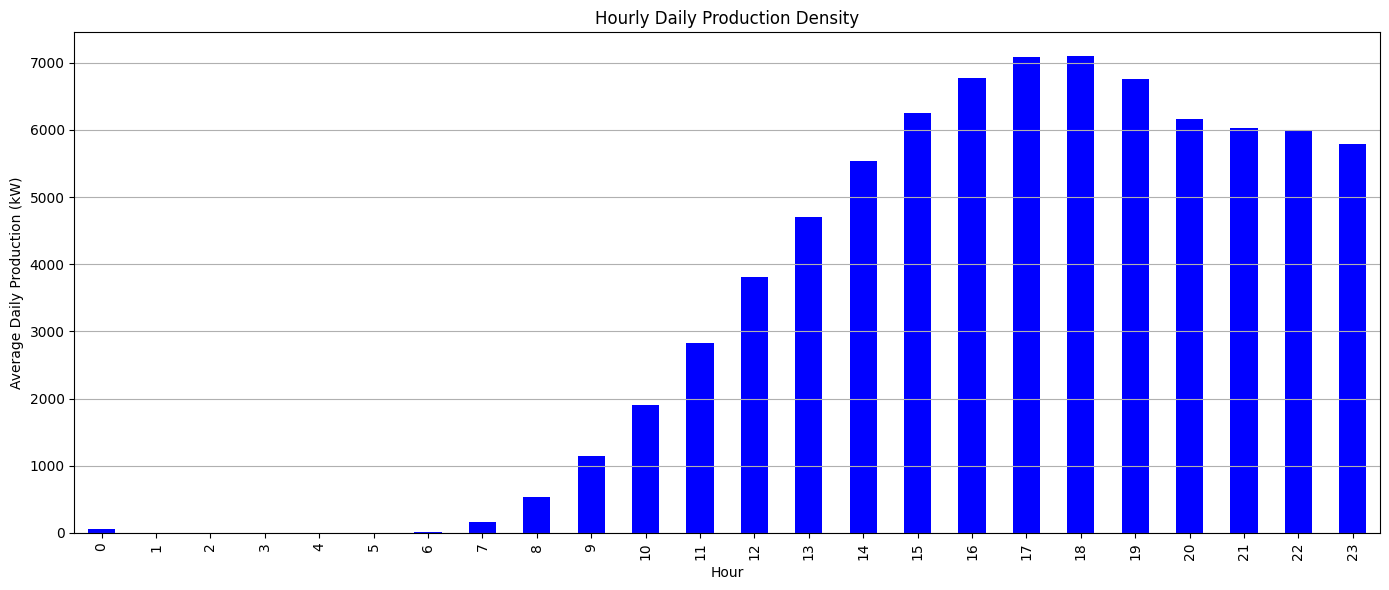

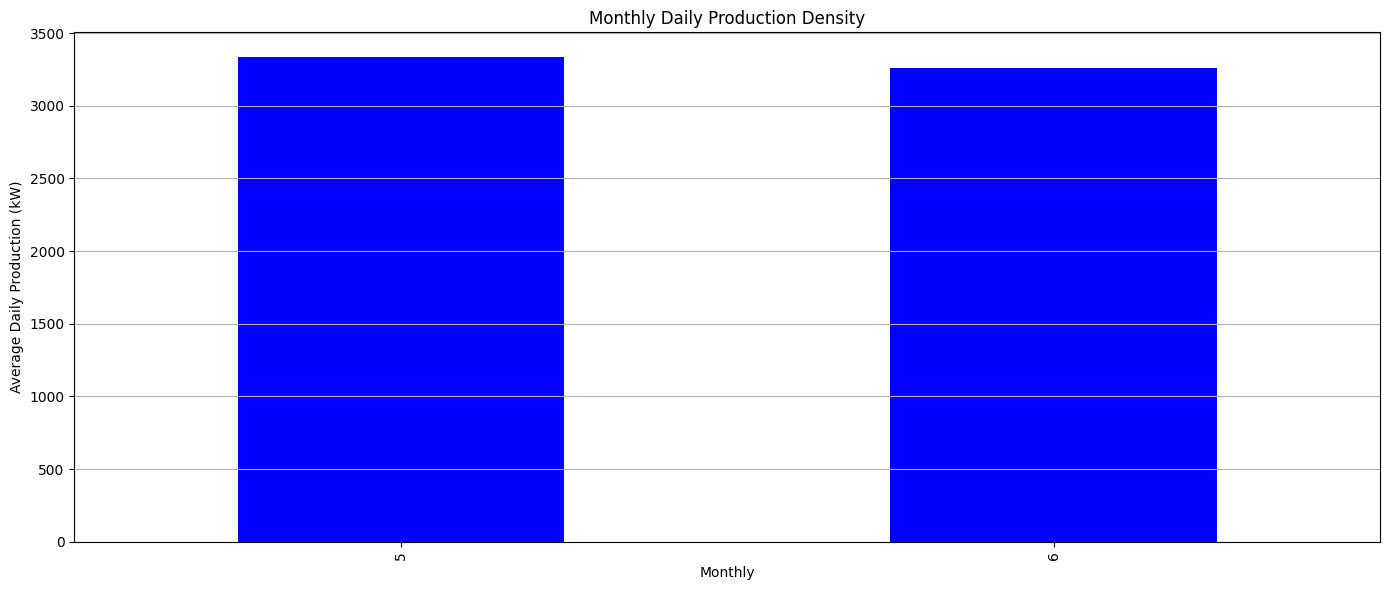

In [14]:
# Hourly Daily Production Density
hourly_yield = df_1_Generation.groupby(df_1_Generation['DATE_TIME'].dt.hour)['DAILY_YIELD'].mean()

plt.figure(figsize=(14,6))
hourly_yield.plot(kind='bar', color='blue')
plt.title('Hourly Daily Production Density')
plt.xlabel('Hour')
plt.ylabel('Average Daily Production (kW)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Monthly Daily Production Density
hourly_yield = df_1_Generation.groupby(df_1_Generation['DATE_TIME'].dt.month)['DAILY_YIELD'].mean()

plt.figure(figsize=(14,6))
hourly_yield.plot(kind='bar', color='blue')
plt.title('Monthly Daily Production Density')
plt.xlabel('Monthly')
plt.ylabel('Average Daily Production (kW)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

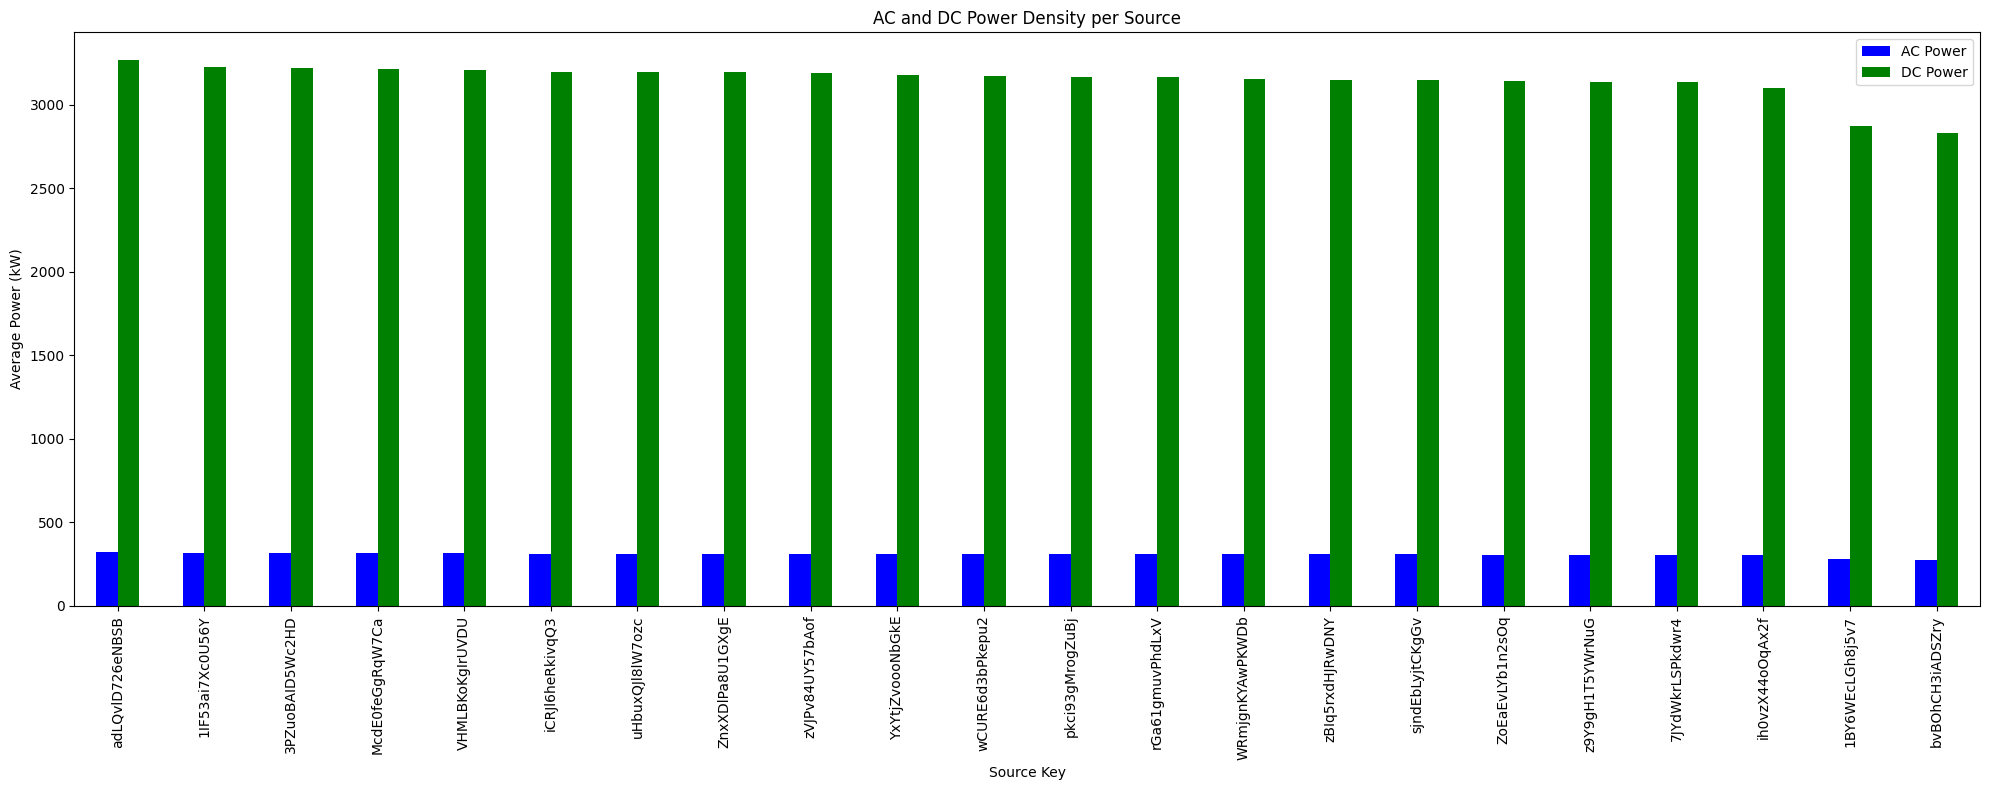

In [15]:
#  AC and DC Power Density per Source
grouped = df_1_Generation.groupby('SOURCE_KEY').mean(numeric_only=True)[['AC_POWER', 'DC_POWER']]

grouped.sort_values(by='AC_POWER', ascending=False).plot(kind='bar', stacked=False, figsize=(20,8), color=['blue', 'green'])
plt.title('AC and DC Power Density per Source')
plt.xlabel('Source Key')
plt.ylabel('Average Power (kW)')
plt.xticks(rotation=90)
plt.legend(['AC Power', 'DC Power'])
plt.tight_layout()
plt.show()

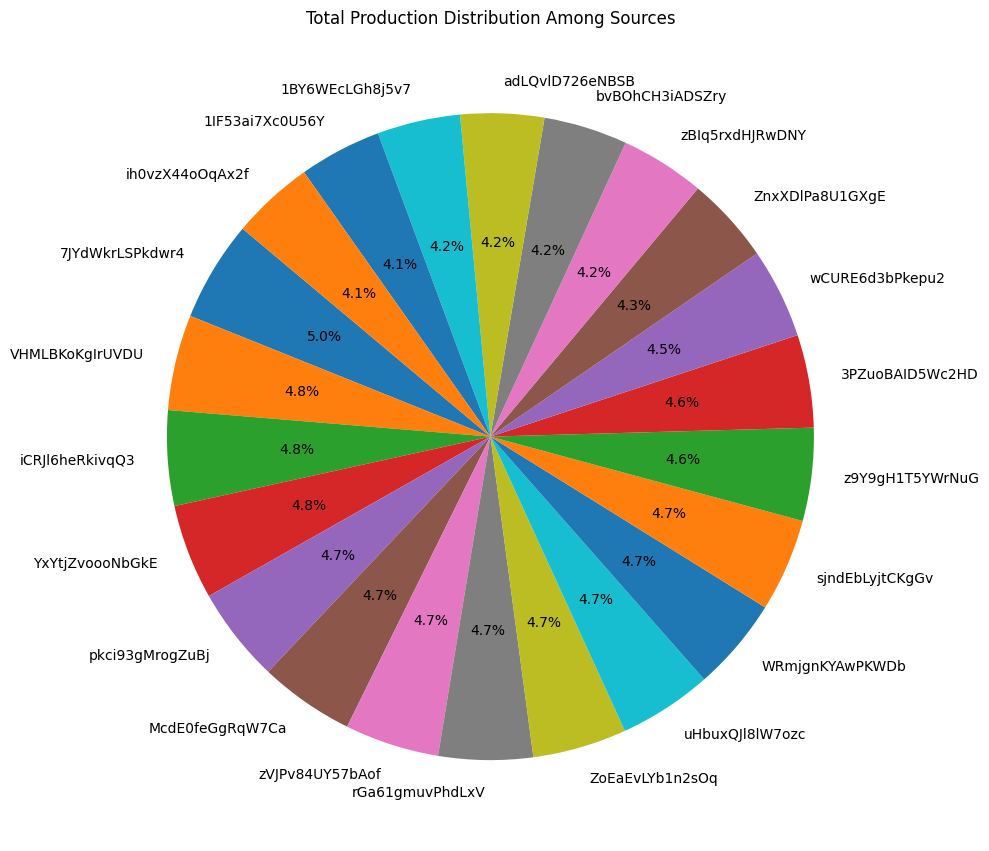

In [16]:
# Total Production Distribution Among Sources
grouped_total_yield = df_1_Generation.groupby('SOURCE_KEY')['TOTAL_YIELD'].last()

plt.figure(figsize=(10,10))
grouped_total_yield.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Production Distribution Among Sources')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [17]:
# AC Power per Source
import plotly.express as px

fig = px.scatter(df_1_Generation, x="SOURCE_KEY", y="AC_POWER", animation_frame=df_1_Generation['DATE_TIME'].dt.hour,
                 range_y=[df_1_Generation['AC_POWER'].min(), df_1_Generation['AC_POWER'].max()],
                 title="Change in AC Power over Time")

fig.show()

In [18]:
# DC Power per Source
import plotly.express as px

fig = px.scatter(df_1_Generation, x="SOURCE_KEY", y="DC_POWER", animation_frame=df_1_Generation['DATE_TIME'].dt.hour,
                 range_y=[df_1_Generation['DC_POWER'].min(), df_1_Generation['DC_POWER'].max()],
                 title="Change in DC Power over Time")

fig.show()

In [19]:
# Daily Yield
import plotly.express as px

import plotly.graph_objects as go

fig = go.Figure()

df_gen = df_1_Generation.groupby('DATE_TIME').sum(numeric_only=True).reset_index()

df_gen['hour'] = df_gen['DATE_TIME'].dt.hour

fig.add_trace(go.Scatter(
    x=df_gen['DATE_TIME'],
    y=df_gen['DAILY_YIELD'],
    mode='lines+markers',
    name='Daily Yield',
    line=dict(color='darkblue', width=3),
    marker=dict(size=8, color=df_gen['DAILY_YIELD'], colorscale='Viridis', showscale=True),
    fill='tozeroy',
    fillcolor='rgba(100, 150, 250, 0.1)'
))

fig.update_layout(
    plot_bgcolor="white",
    title={
        'text': "Daily Yield",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Date",
    yaxis_title="Daily Yield (kW)",
    title_font=dict(size=26, family="Arial", color="black"),
    xaxis_title_font=dict(size=20, family="Arial", color="grey"),
    yaxis_title_font=dict(size=20, family="Arial", color="grey"),
    xaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    yaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    hovermode="x",
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Arial"),
    xaxis=dict(tickangle=-45, nticks=20),
    yaxis=dict(gridcolor="lightgrey")
)

fig.show()

In [20]:
#  Change in AC Power Throughout the Day
import plotly.express as px
df_gen['time'] = df_gen['DATE_TIME'].dt.time
fig = px.scatter(df_gen, x="time", y="AC_POWER", animation_frame=df_gen['DATE_TIME'].dt.date,
                 range_y=[df_gen['AC_POWER'].min(), df_gen['AC_POWER'].max()],
                 color="AC_POWER", color_continuous_scale='Reds',
                 labels={"AC_POWER": "AC Power", "time": "Time"},
                 title="Change in AC Power Throughout the Day")

fig.update_traces(marker=dict(size=8))
fig.update_layout(legend_title_text="AC Power", hovermode="x")
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="AC Power (kW)")

fig.show()

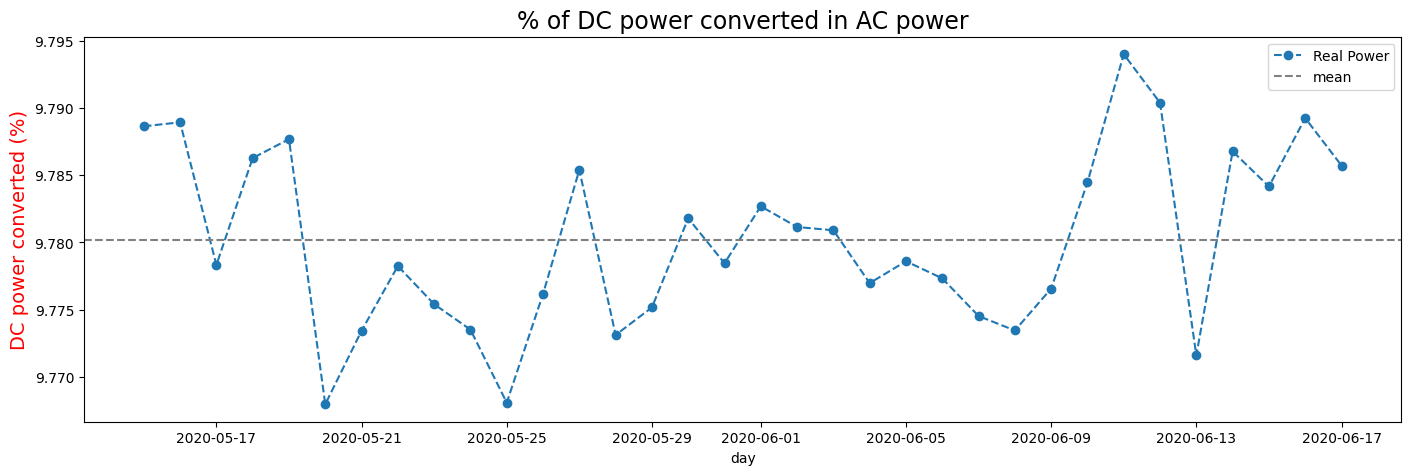

In [21]:
# % of DC power converted in AC power
losses_1 = df_1_Generation.copy()
losses_1['day'] = losses_1['DATE_TIME'].dt.date
losses_1 = losses_1.groupby('day').sum(numeric_only=True)
losses_1['losses'] = losses_1['AC_POWER'] / losses_1['DC_POWER'] * 100

plt.figure(figsize=(17, 5))
losses_1['losses'].plot(style='o--', label='Real Power')
plt.title('% of DC power converted in AC power', size=17)
plt.ylabel('DC power converted (%)', fontsize=14, color='red')
plt.axhline(losses_1['losses'].mean(), linestyle='--', color='gray', label='mean')
plt.legend()
plt.show()

Correlation between different columns

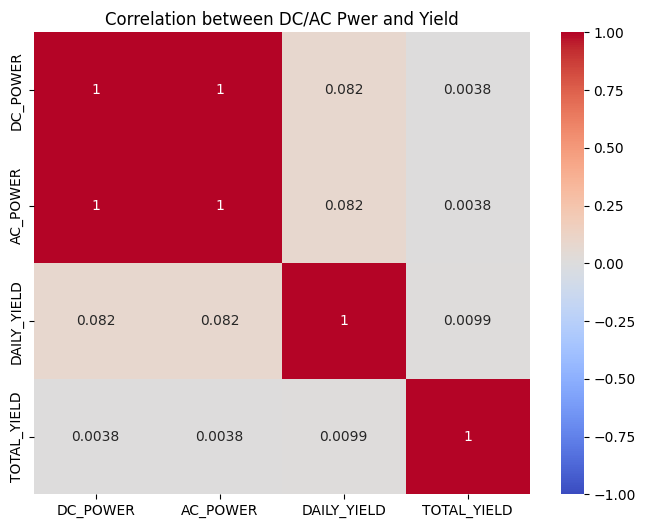

In [22]:
correlation = df_1_Generation[['DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'TOTAL_YIELD']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation between DC/AC Pwer and Yield')
plt.show()

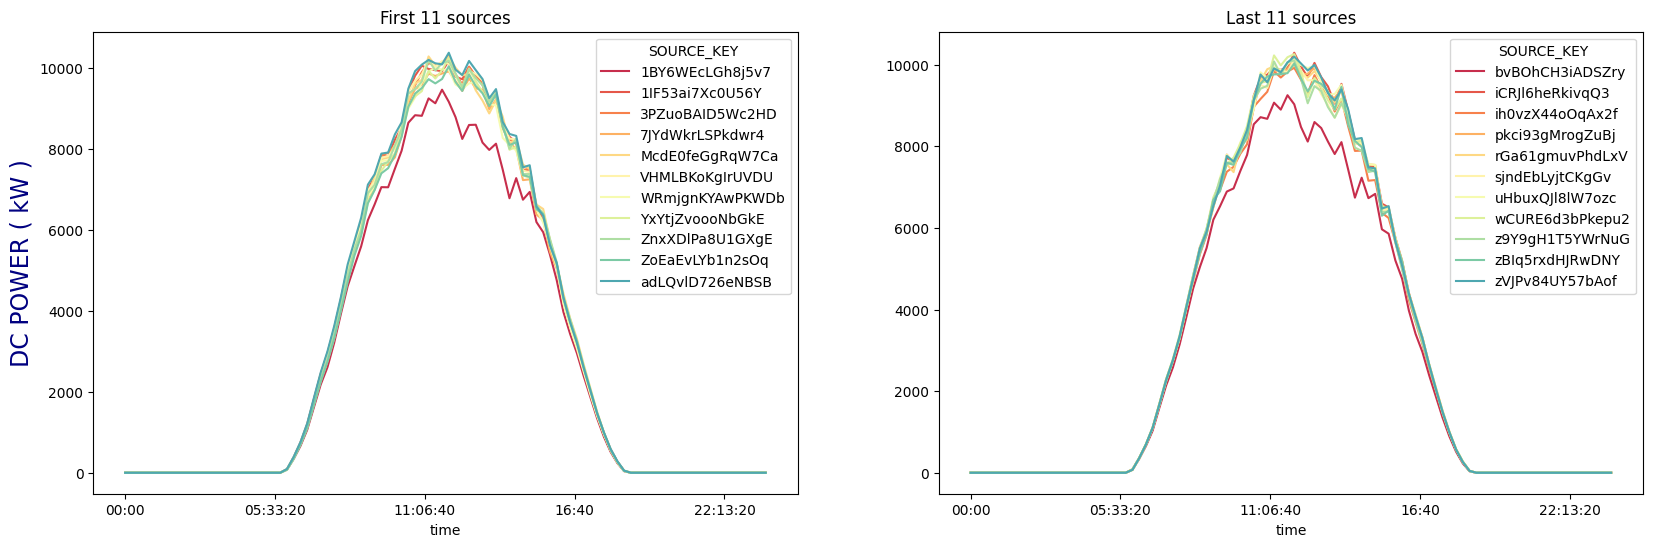

In [23]:
# Inverter Analysis per Source
df_1_Generation['time']=df_1_Generation['DATE_TIME'].dt.time
df_1_Generation_grouped=df_1_Generation.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
df_1_Generation_grouped.iloc[:,0:11].plot(ax=ax[0],color=cmap)
df_1_Generation_grouped.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

<ipython-input-24-36c0da488116>:9: UserWarning:

When passing multiple axes, layout keyword is ignored.

<ipython-input-24-36c0da488116>:9: UserWarning:

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.



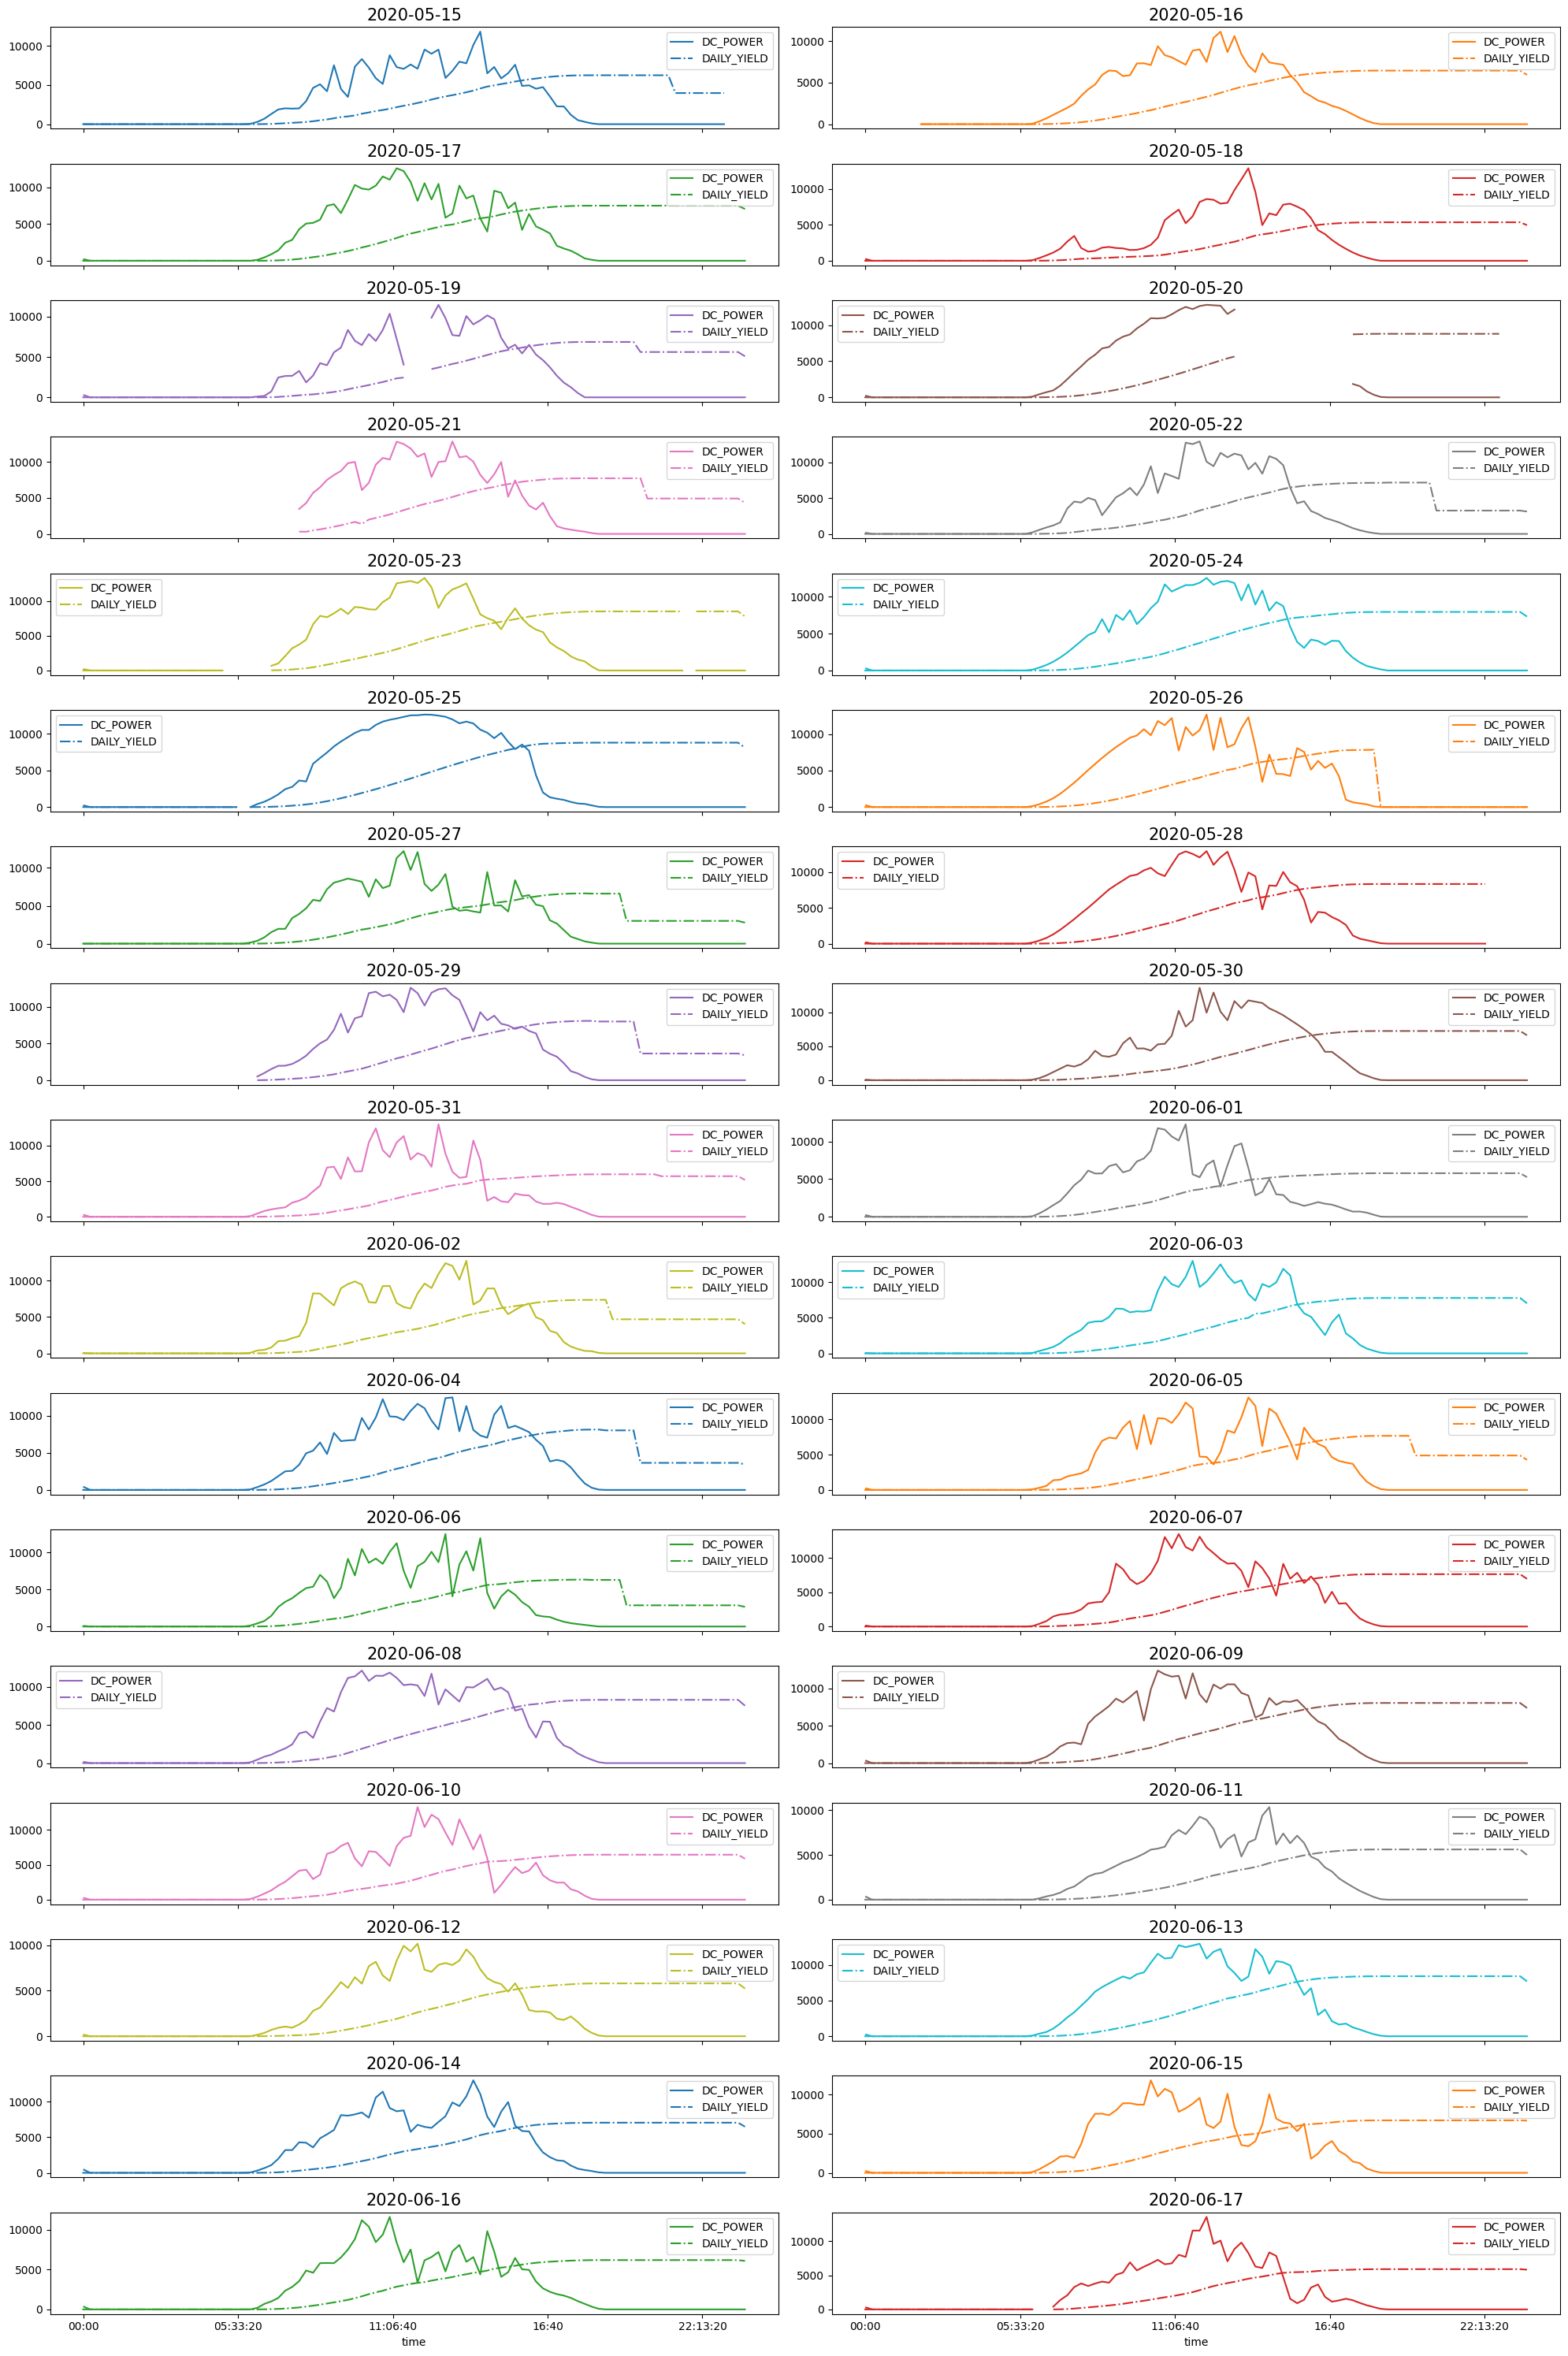

In [24]:
# DC POWER and DAILY YIELD in PLANT_1 per Source
df_1_Generation['day']=df_1_Generation['DATE_TIME'].dt.date


# just for columns
cols=df_1_Generation.groupby(['time','day'])['DC_POWER'].mean().unstack()

ax =df_1_Generation.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
df_1_Generation.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

## Weather Analysis

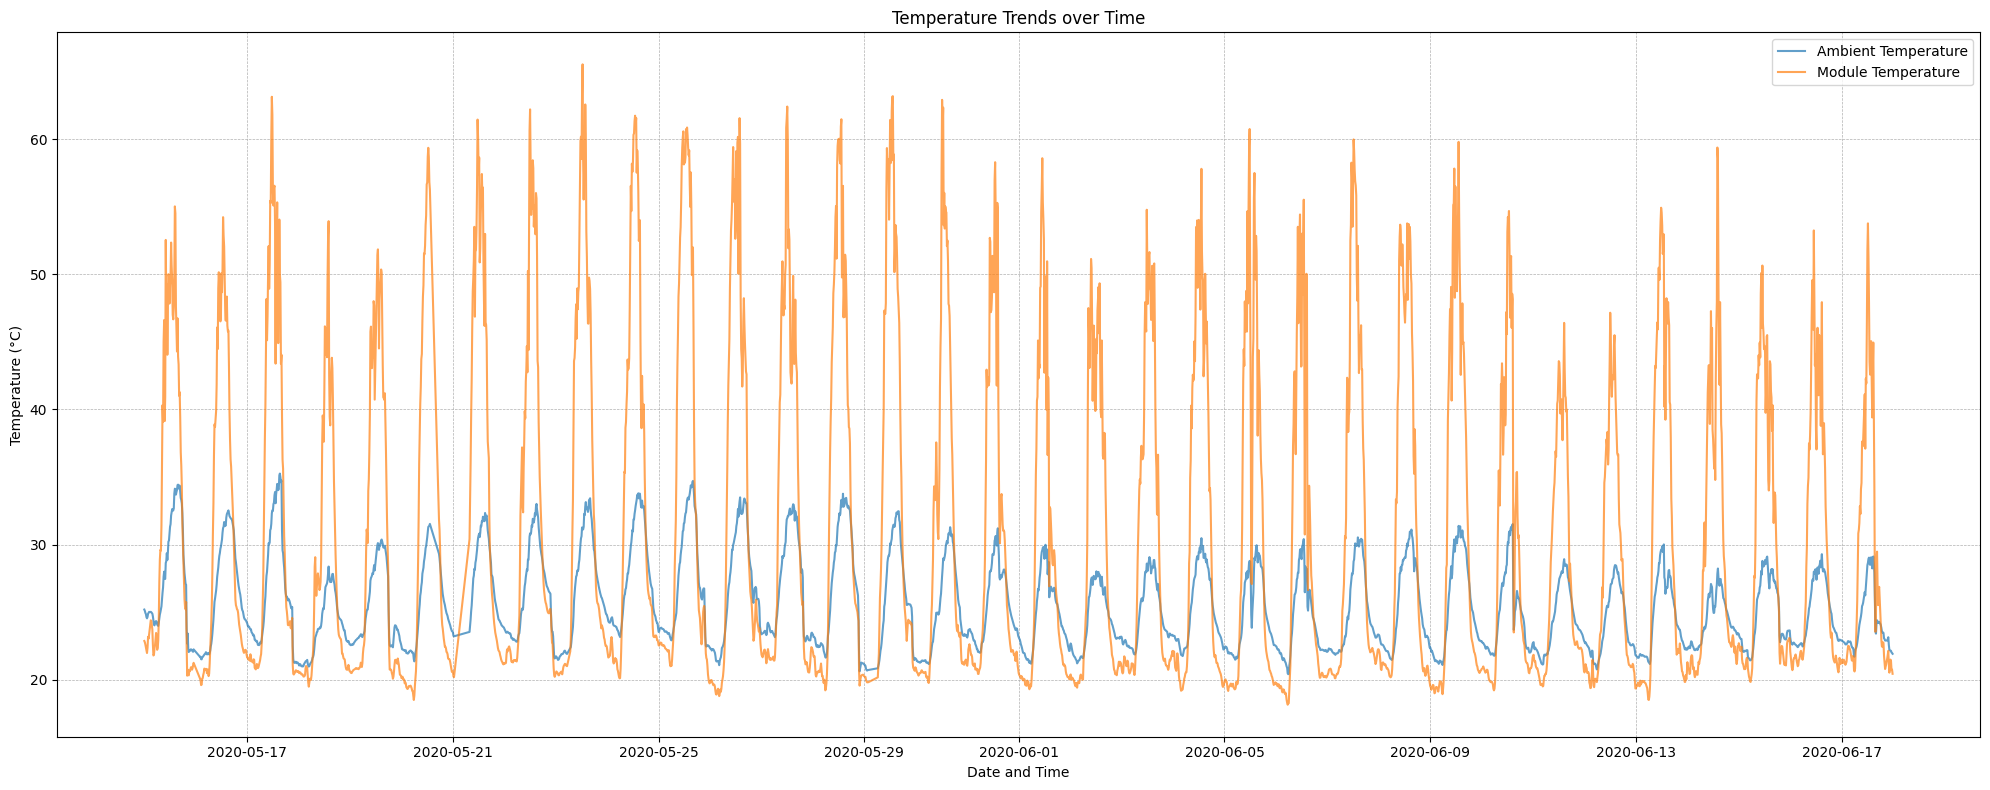

In [25]:
# Temperature Over Time
plt.figure(figsize=(20,8))
plt.plot(df_1_Weather['DATE_TIME'], df_1_Weather['AMBIENT_TEMPERATURE'], label='Ambient Temperature', alpha=0.7)
plt.plot(df_1_Weather['DATE_TIME'], df_1_Weather['MODULE_TEMPERATURE'], label='Module Temperature', alpha=0.7)
plt.title('Temperature Trends over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

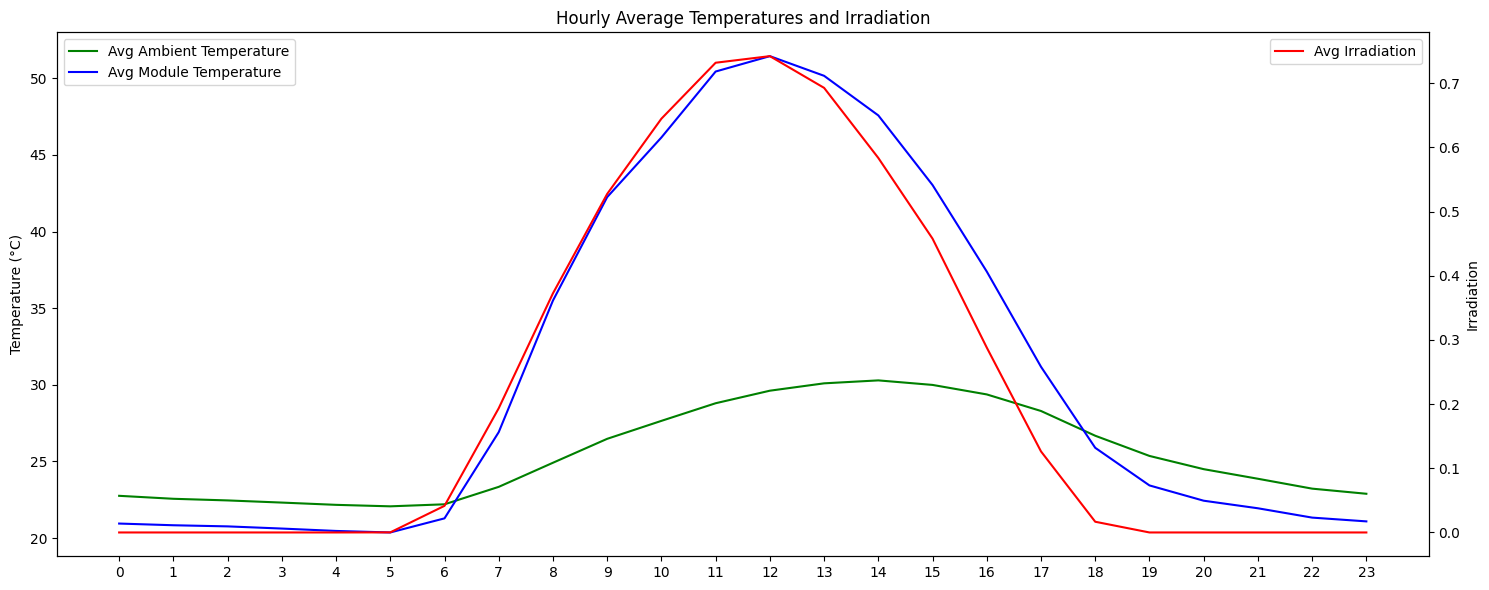

In [26]:
# Average Hourly Temperature and Irradiation

df_1_Weather['HOUR'] = df_1_Weather['DATE_TIME'].dt.hour

hourly_avg = df_1_Weather.groupby('HOUR').mean(numeric_only=True)

fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()

ax1.plot(hourly_avg.index, hourly_avg['AMBIENT_TEMPERATURE'], 'g-', label='Avg Ambient Temperature')
ax1.plot(hourly_avg.index, hourly_avg['MODULE_TEMPERATURE'], 'b-', label='Avg Module Temperature')
ax2.plot(hourly_avg.index, hourly_avg['IRRADIATION'], 'r-', label='Avg Irradiation')

ax1.set_ylabel('Temperature (°C)', color='black')
ax2.set_ylabel('Irradiation', color='black')

plt.title('Hourly Average Temperatures and Irradiation')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticks(range(0, 24))
fig.tight_layout()

plt.show()

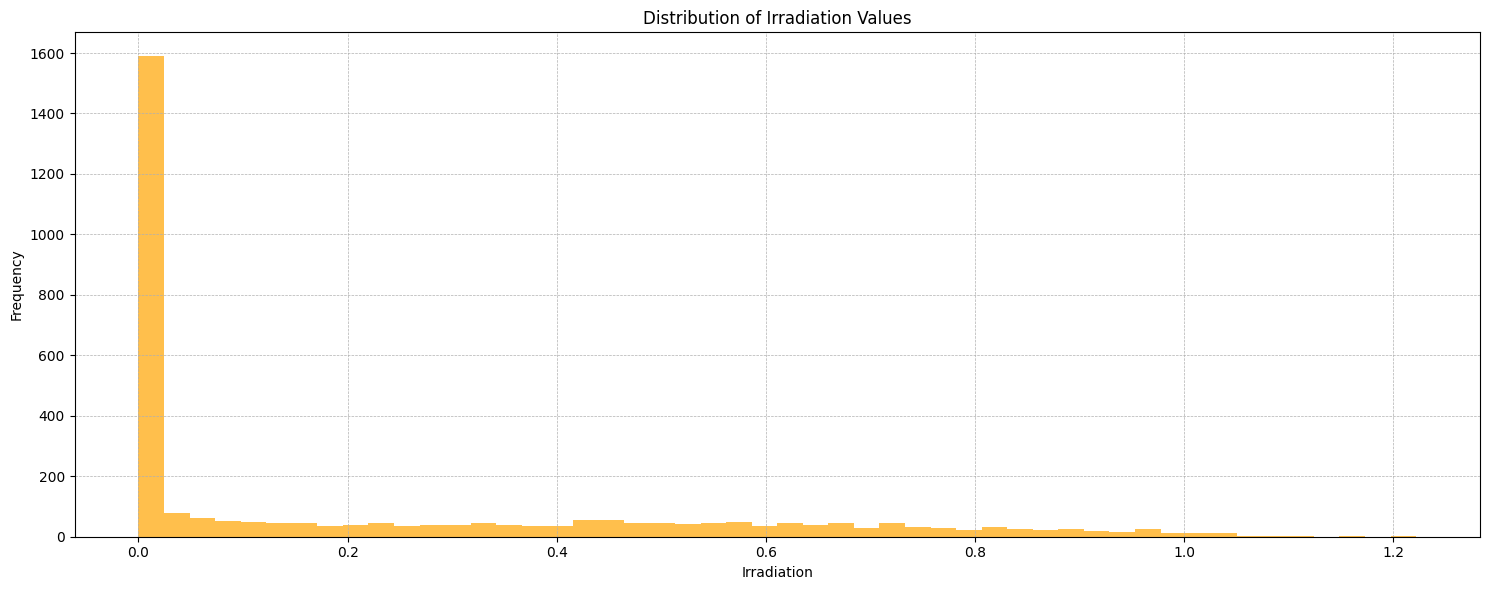

In [27]:
# Distribution of Irradiation Values
plt.figure(figsize=(15, 6))
plt.hist(df_1_Weather['IRRADIATION'], bins=50, color='orange', alpha=0.7)
plt.title('Distribution of Irradiation Values')
plt.xlabel('Irradiation')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

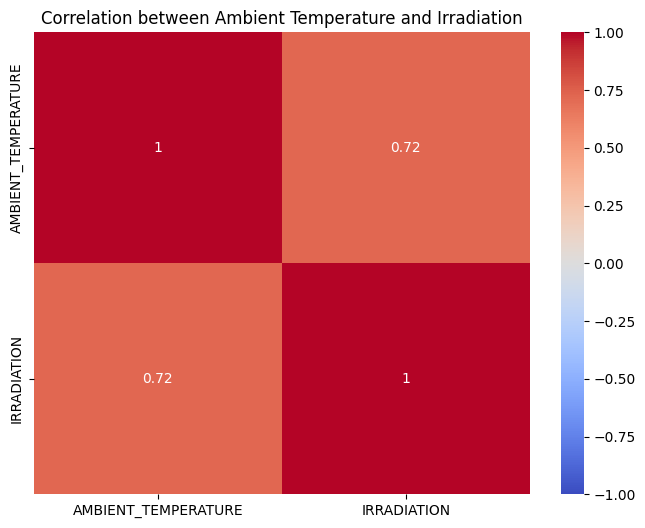

In [28]:
# Correlation between Ambient Temperature and Irradiation
correlation = df_1_Weather[['AMBIENT_TEMPERATURE', 'IRRADIATION']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Ambient Temperature and Irradiation')
plt.show()

In [29]:
print(df_1_Weather['DATE_TIME'].dt.hour.unique())
print(df_1_Weather['DATE_TIME'].dt.month.unique())
print(df_1_Weather['DATE_TIME'].dt.year.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[5 6]
[2020]


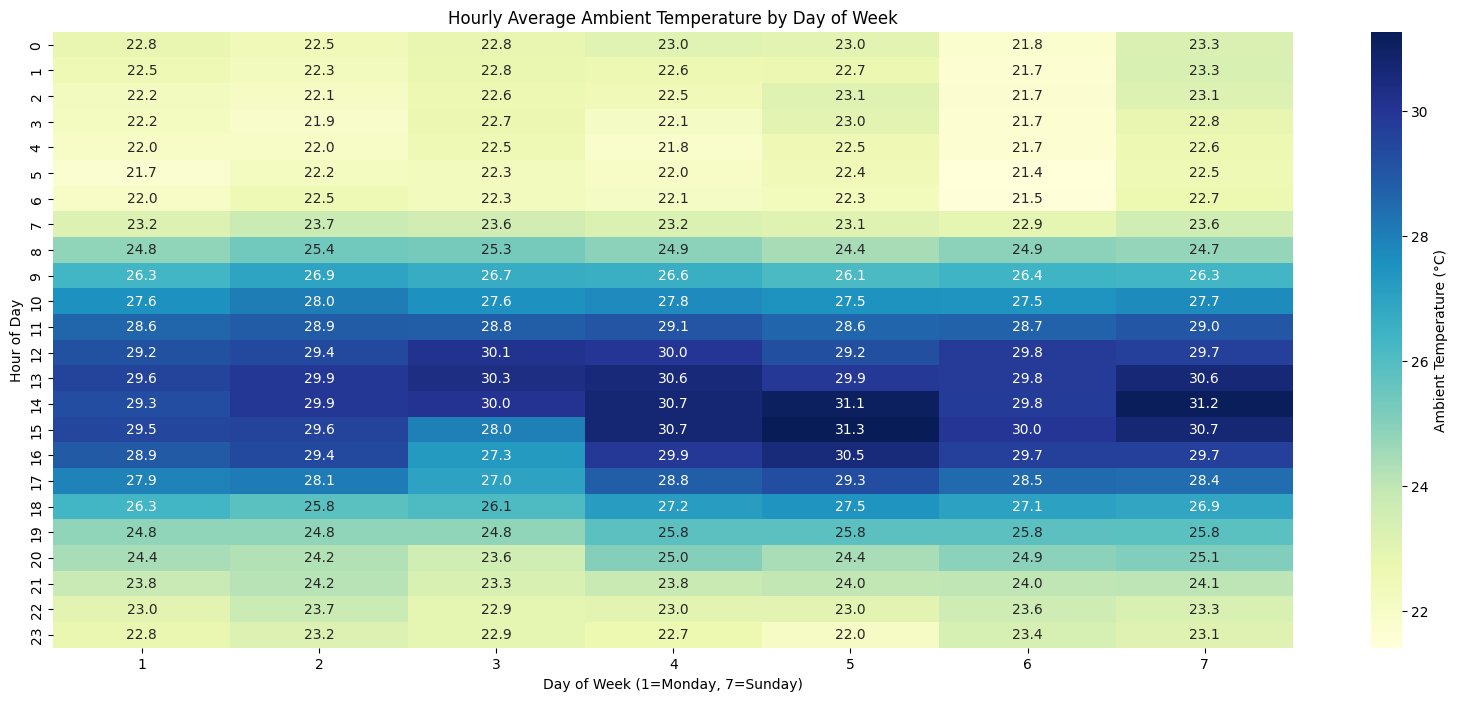

In [30]:
# Hourly Average Ambient Temperature by Day of Week
df_1_Weather['DAY_OF_WEEK'] = df_1_Weather['DATE_TIME'].dt.dayofweek + 1

pivot_temp = df_1_Weather.groupby(['HOUR', 'DAY_OF_WEEK'])['AMBIENT_TEMPERATURE'].mean().unstack()

plt.figure(figsize=(20, 8))
sns.heatmap(pivot_temp, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Ambient Temperature (°C)'})
plt.title('Hourly Average Ambient Temperature by Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Hour of Day')
plt.show()

Correlation Between Temperature and Irradiation

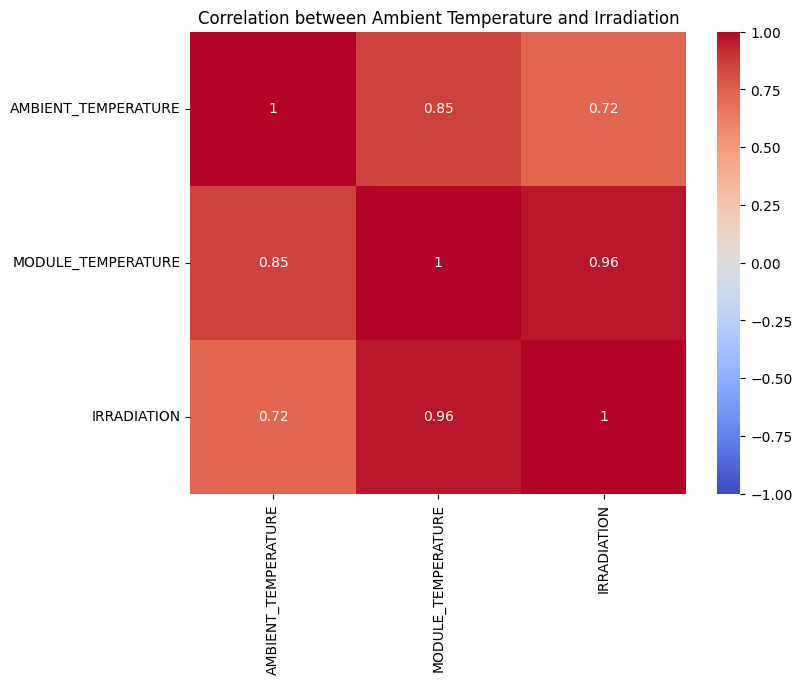

In [31]:
correlation = df_1_Weather[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Ambient Temperature and Irradiation')
plt.show()

In [32]:
# Daistr
import plotly.express as px

import plotly.graph_objects as go

fig = go.Figure()

df_gen = df_amb_irr = df_1_Weather.groupby(['AMBIENT_TEMPERATURE']).mean(numeric_only=True).reset_index()


fig.add_trace(go.Scatter(
    x=df_gen['AMBIENT_TEMPERATURE'],
    y=df_gen['IRRADIATION'],
    mode='lines+markers',
    name='IRRADIATION',
    line=dict(color='darkblue', width=3),
    marker=dict(size=8, color=df_gen['IRRADIATION'], colorscale='Viridis', showscale=True),
    fill='tozeroy',
    fillcolor='rgba(100, 150, 250, 0.1)'
))

fig.update_layout(
    plot_bgcolor="white",
    title={
        'text': "IRRADIATION",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="AMBIENT_TEMPERATURE",
    yaxis_title="IRRADIATION",
    title_font=dict(size=26, family="Arial", color="black"),
    xaxis_title_font=dict(size=20, family="Arial", color="grey"),
    yaxis_title_font=dict(size=20, family="Arial", color="grey"),
    xaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    yaxis_tickfont=dict(size=14, family="Arial", color="grey"),
    hovermode="x",
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Arial"),
    xaxis=dict(tickangle=-45, nticks=20),
    yaxis=dict(gridcolor="lightgrey")
)

fig.show()

<ipython-input-33-b9ff23b5ea69>:5: UserWarning:

When passing multiple axes, layout keyword is ignored.



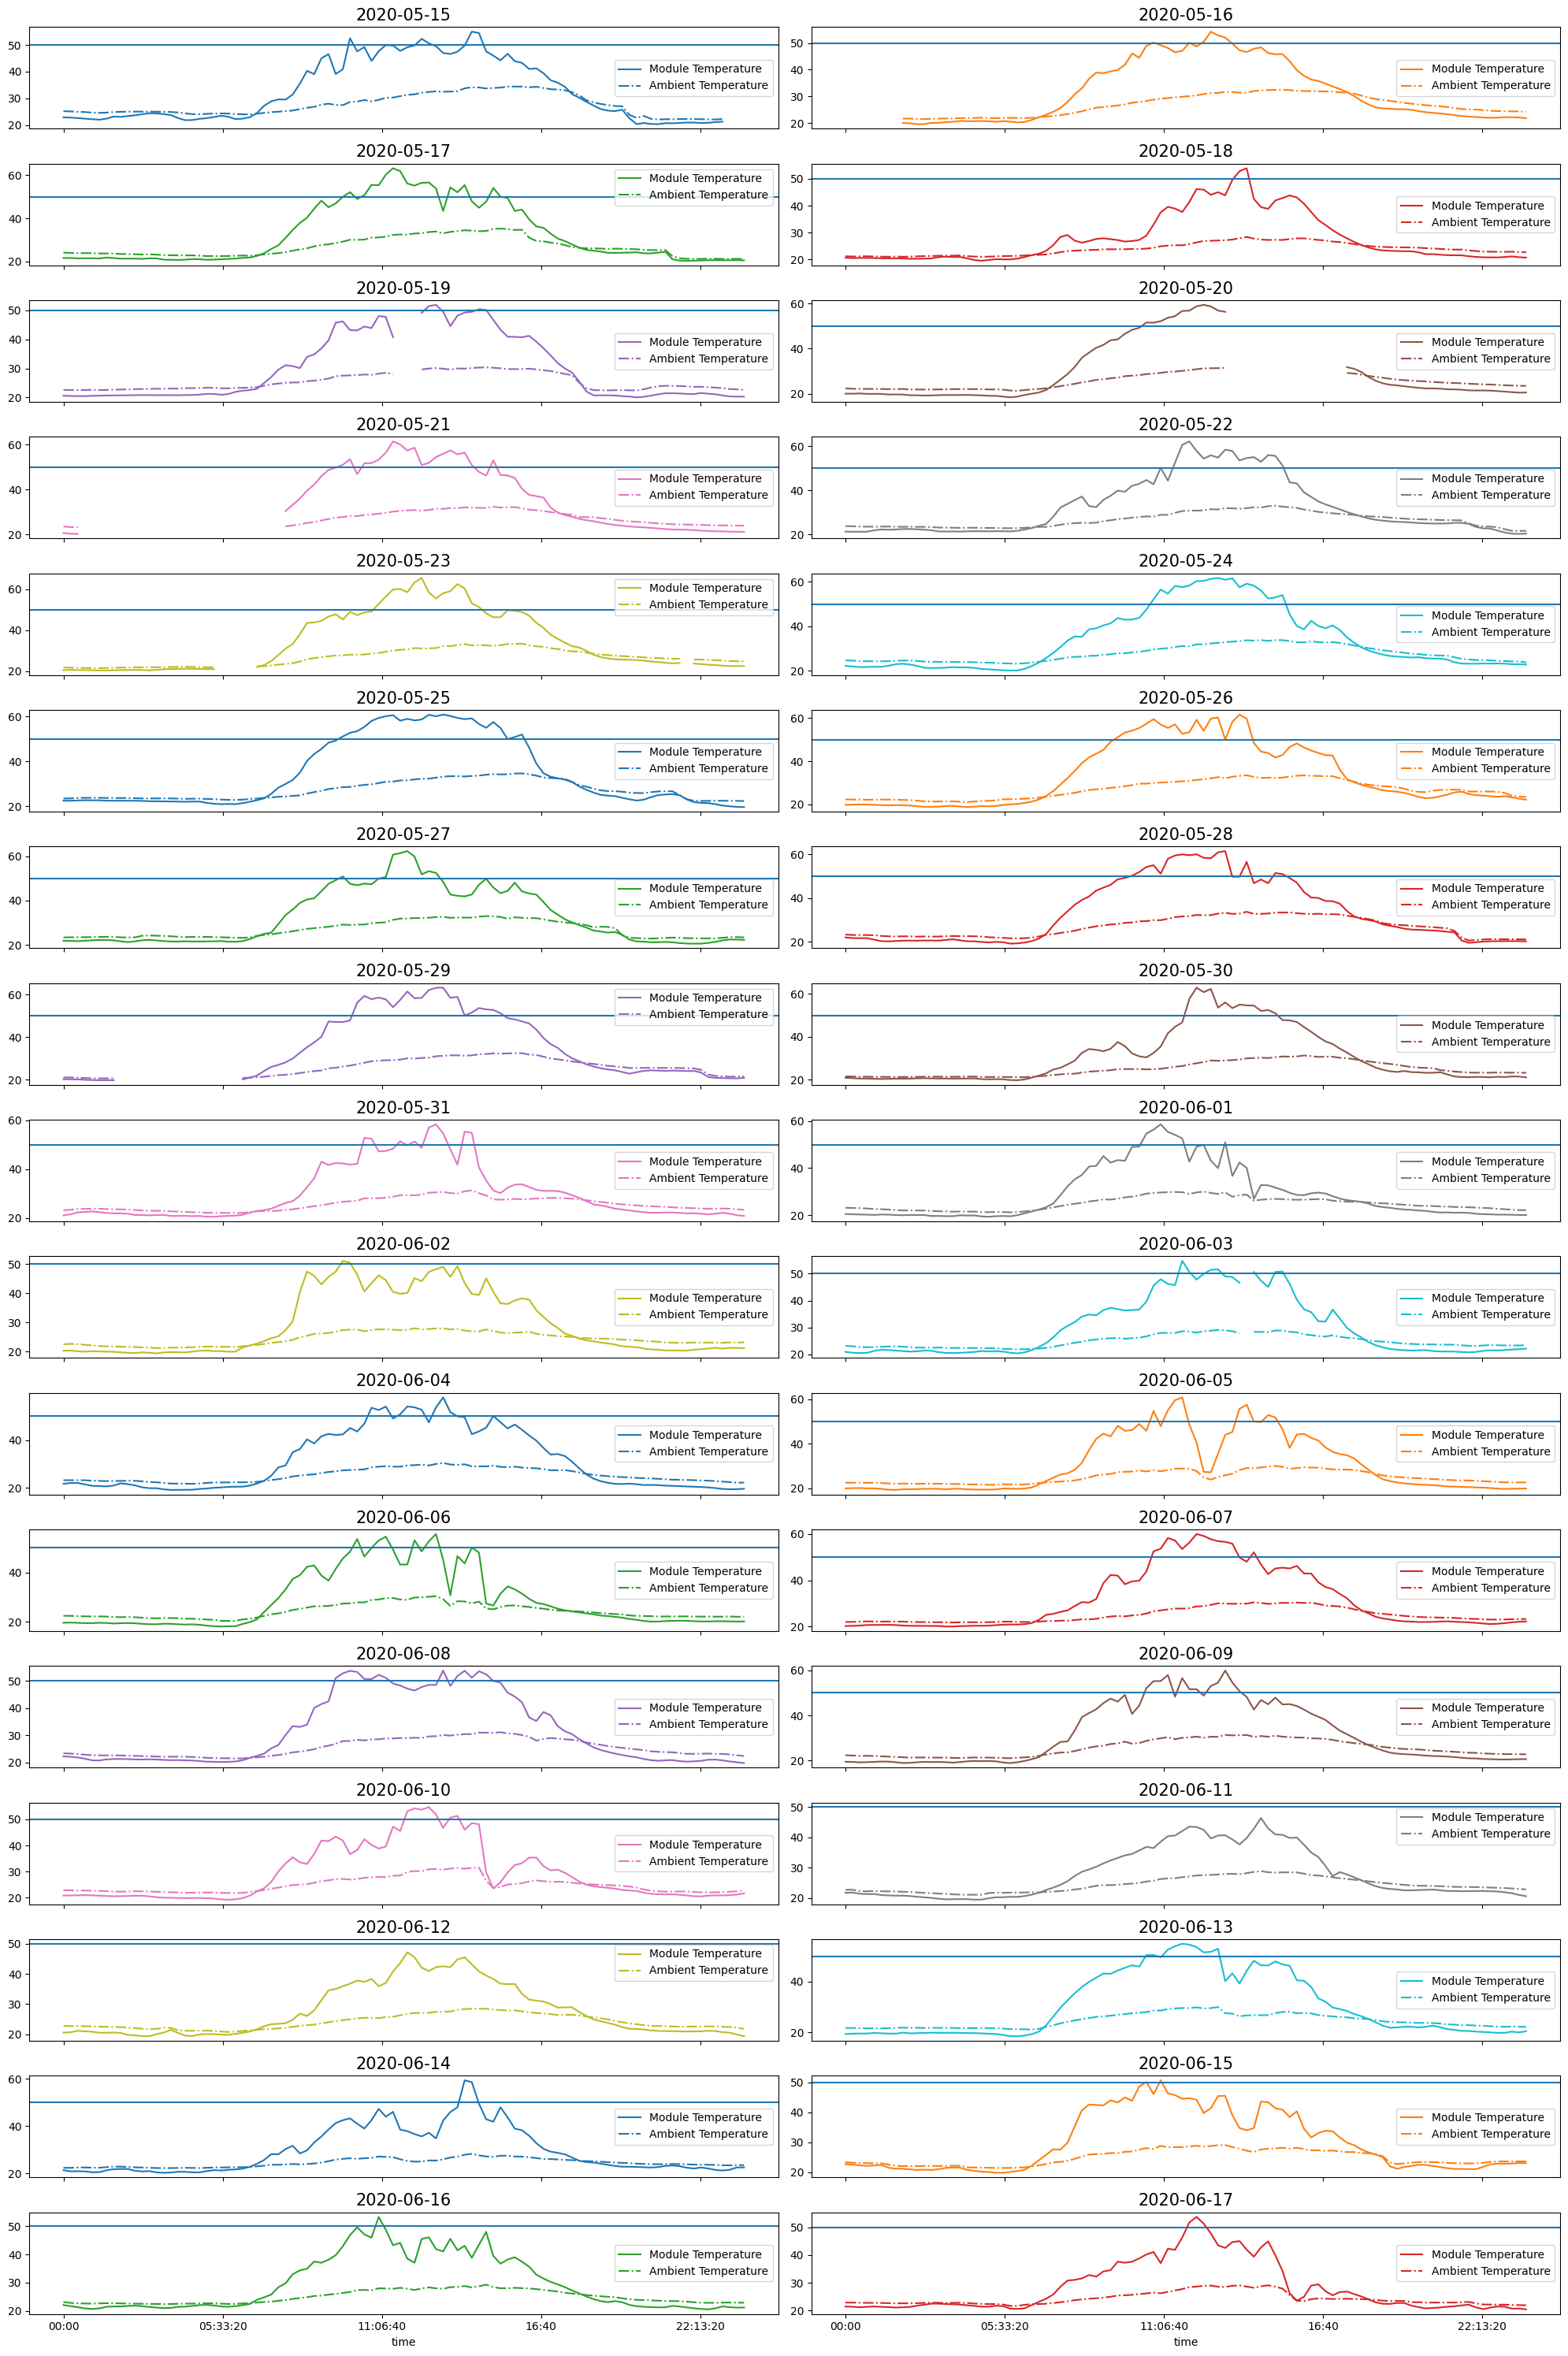

In [33]:
# Module temperature and Ambient Temperature
df_1_Weather['time']=df_1_Weather['DATE_TIME'].dt.time
df_1_Weather['day']=df_1_Weather['DATE_TIME'].dt.date
ax= df_1_Weather.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
df_1_Weather.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

## Merged Data Exploration

In [34]:
df_1_Generation['DATE_TIME'] = pd.to_datetime(df_1_Generation['DATE_TIME'], format='%d-%m-%Y %H:%M')
df_1_Weather['DATE_TIME'] = pd.to_datetime(df_1_Weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [35]:
df_plant_1 = pd.merge(df_1_Generation, df_1_Weather, on=['DATE_TIME','time','day'])

In [36]:
df_plant_1.head()

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD      time         day  PLANT_ID_y     SOURCE_KEY_y  \
0    6259559.0  00:00:00  2020-05-15     4135001  HmiyD2TTLFNqkNe   
1    6183645.0  00:00:00  2020-05-15     4135001  HmiyD2TTLFNqkNe   
2    6987759.0  00:00:00  2020-05-15     4135001  HmiyD2TTLFNqkNe   
3    7602960.0  00:00:00  2020-05-15     4135001  HmiyD2TTLFNqkNe   
4    7158964.0  00:00:00  2020-05-15     4135001  HmiyD2TTLFNqkNe   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  HOUR  DAY_OF_WEEK  
0            25.184316           22.857507          0.0     0            5  
1            25.184316           22.857507          0.0     0            5  
2            25.184316           22.857507          0.0     0            5  
3            25.184316           22.857507          0.0     0            5  
4            25.184316           22.857507          0.0     0            5

In [37]:
df_plant_1.duplicated().sum()

0

In [38]:
#Generating 15 min time blocks
tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')
tb=tb[:-1]
ts = tb.strftime('%H:%M')
block_dict = {}
j=1
for i in range(len(ts)):
    block_dict[ts[i]] =  j
    j+=1
df_plant_1['time'] = df_plant_1['time'].astype(str)
df_plant_1['BLOCK'] = pd.to_datetime(df_plant_1['time']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])
np.save('timestamp_block_dictionary.npy',block_dict)

## Column re-ordering
cols = df_plant_1.columns.tolist()
df_plant_1 = df_plant_1[[cols[-1]]+[cols[-2]]+[cols[-3]]+cols[:-3]]

<ipython-input-38-f1a7e181556c>:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [39]:
df_plant_1_predict = df_plant_1.drop([ 'PLANT_ID_x','PLANT_ID_y', 'SOURCE_KEY_x', 'SOURCE_KEY_y', 'TOTAL_YIELD', 'time', 'day'], axis=1)

In [40]:
df_plant_1_predict['month'] = df_plant_1_predict['DATE_TIME'].dt.month
df_plant_1_predict['day'] = df_plant_1_predict['DATE_TIME'].dt.month
df_plant_1_predict['hour'] = df_plant_1_predict['DATE_TIME'].dt.hour

# Predicting Daily Yield

## Feature Selection and Elimination

In [41]:
df_plant_1_predict['DATE'] = df_plant_1_predict['DATE_TIME'].dt.date
last_3_days = df_plant_1_predict['DATE'].astype(str).unique()[-3:]
df_test = df_plant_1_predict[df_plant_1_predict['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])
#Saving Test data
df_test.reset_index(drop=True)
df_test['test'] = 1
#Saving all as Train for indexes not present in test data
df_train = df_plant_1_predict[~df_plant_1_predict.index.isin(df_test.index)]
df_train['test'] = 0

<ipython-input-41-9e7c5605649b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
df_plant_1_predict =pd.concat([df_train, df_test]).drop(['DATE','DATE_TIME'], axis=1)

In [43]:
outlier_imputer_dict = {}

for var in df_plant_1_predict.columns[3:]:
    percentile_dict = {}

    NinetyNine_percentile = np.percentile(df_plant_1_predict[var],99)

    First_percentile = np.percentile(df_plant_1_predict[var],1)

    percentile_dict['99th'] =  NinetyNine_percentile
    percentile_dict['1st'] =  First_percentile
    # Saving as dictionary for each column
    outlier_imputer_dict[var] = percentile_dict

#Saving the final dictionary
np.save('outlier_imputer_dict',outlier_imputer_dict)

def outlier_imputer(df):

  #Loading Outlier Imputer dictionary
  outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()

  for var in df.columns[3:]:

      df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']

      df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st']

  return df

print(outlier_imputer_dict)

#Applying imputation on Train & Test
df_plant_1_predict = outlier_imputer(df_plant_1_predict)

{'DC_POWER': {'99th': 12900.362854400002, '1st': 0.0}, 'AC_POWER': {'99th': 1258.0698036100005, '1st': 0.0}, 'DAILY_YIELD': {'99th': 8802.0, '1st': 0.0}, 'AMBIENT_TEMPERATURE': {'99th': 33.761303733333335, '1st': 21.13065793333333}, 'MODULE_TEMPERATURE': {'99th': 60.33080693333334, '1st': 19.1575074}, 'IRRADIATION': {'99th': 0.999309628, '1st': 0.0}, 'month': {'99th': 6.0, '1st': 5.0}, 'day': {'99th': 6.0, '1st': 5.0}, 'hour': {'99th': 23.0, '1st': 0.0}, 'test': {'99th': 1.0, '1st': 0.0}}


In [44]:
percentile_dict = {}
for i in df_plant_1_predict.columns[3:]:
    a_list = []
    for j in [1,10,25,50,75,90,99,100]:
        a_list.append(round(np.percentile(df_plant_1_predict[i],j),2))
    percentile_dict[i] = a_list
pd.DataFrame(pd.concat([pd.DataFrame({'Percentiles':[1,10,25,50,75,90,99,100]}),pd.DataFrame(percentile_dict)],axis=1))


Percentiles  DC_POWER  AC_POWER  DAILY_YIELD  AMBIENT_TEMPERATURE  \
0            1      0.00      0.00         0.00                21.13   
1           10      0.00      0.00         0.00                21.90   
2           25      0.00      0.00         0.00                22.72   
3           50    428.57     41.45      2658.47                24.67   
4           75   6365.47    623.56      6274.00                27.96   
5           90   9762.91    954.07      7768.75                30.58   
6           99  12900.31   1258.05      8802.00                33.76   
7          100  12900.36   1258.07      8802.00                33.76   

   MODULE_TEMPERATURE  IRRADIATION  month  day  hour  test  
0               19.16         0.00    5.0  5.0   0.0   0.0  
1               20.20         0.00    5.0  5.0   2.0   0.0  
2               21.12         0.00    5.0  5.0   6.0   0.0  
3               24.82         0.03    6.0  6.0  12.0   0.0  
4               41.69         0.45    6.0  6.0  17.0   0.0  
5               50.67         0.72    6.0  6.0  21.0   0.0  
6               60.33         1.00    6.0  6.0  23.0   1.0  
7               60.33         1.00    6.0  6.0  23.0   1.0

In [ ]:
train = df_plant_1_predict.drop(['DAILY_YIELD'],axis=1)
test = df_plant_1_predict[['DAILY_YIELD','test']]

In [ ]:
train.columns

Index(['BLOCK', 'DAY_OF_WEEK', 'HOUR', 'DC_POWER', 'AC_POWER',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'month',
       'day', 'hour', 'test'],
      dtype='object')

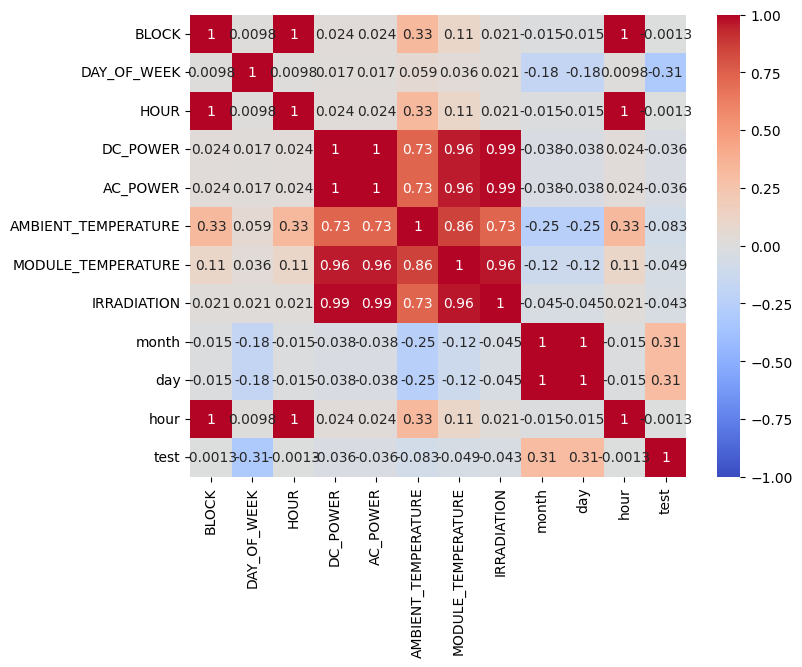

In [ ]:
correlation = train.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
train = train.drop(['AC_POWER','DC_POWER'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train = train.query('test == 0')
X_test = train.query('test == 1')
y_train = test.query('test == 0')
y_test = test.query('test == 1')
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (62482, 10) (62482, 2)
Test (6292, 10) (6292, 2)


In [ ]:
X_train = X_train.drop(['test'], axis=1)
X_test = X_test.drop(['test'], axis=1)
y_train = y_train.drop(['test'], axis=1)
y_test = y_test.drop(['test'], axis=1)

Feature BLOCK: 135992.159738
Feature DAY_OF_WEEK: 46.596567
Feature HOUR: 135917.595794
Feature AMBIENT_TEMPERATURE: 19464.614800
Feature MODULE_TEMPERATURE: 2760.591697
Feature IRRADIATION: 448.773218
Feature month: 4.706171
Feature day: 4.706171
Feature hour: 135917.595794


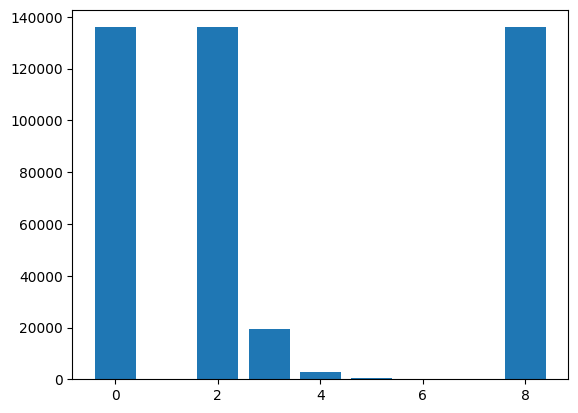

In [ ]:
#Correlation Feature Selection
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
feature_names = X_train.columns
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Training the model with data based on feature selection

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import sqrt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = KNeighborsRegressor(n_neighbors=3)
model1.fit(X_train_fs, y_train)
model2.fit(X_train_fs, y_train)
model3.fit(X_train_fs, y_train)
# evaluate the models
yhat1 = model1.predict(X_test_fs)
yhat2 = model2.predict(X_test_fs)
yhat3 = model3.predict(X_test_fs)
# evaluate predictions
rmae = sqrt(mean_absolute_error(y_test, yhat1))
print('Linear Regression RMAE: %.3f' % rmae)

rmae = sqrt(mean_absolute_error(y_test, yhat2))
print('Random Forest Regression RMAE: %.3f' % rmae)

rmae = sqrt(mean_absolute_error(y_test, yhat3))
print('K Neighbors Regression RMAE: %.3f' % rmae)

accuracy = model1.score(X_test, y_test)
print('Linear Regression accuracy: %.3f' % accuracy)

accuracy = model2.score(X_test, y_test)
print('Random Forest Regression accuracy: %.3f' % accuracy)

accuracy = model3.score(X_test, y_test)
print('K Neighbors Regression accuracy: %.3f' % accuracy)


mse = np.sqrt(mean_squared_error(y_test, yhat1))
print(f'Linear Regression Mean Squared Error: {mse}')

mse = np.sqrt(mean_squared_error(y_test, yhat2))
print(f'Random Forest Regression Mean Squared Error: {mse}')

mse = np.sqrt(mean_squared_error(y_test, yhat3))
print(f'K Neighbors Regression Mean Squared Error: {mse}')


Linear Regression RMAE: 22.461
Random Forest Regression RMAE: 18.647
K Neighbors Regression RMAE: 26.573
Linear Regression accuracy: 0.946
Random Forest Regression accuracy: 0.960
K Neighbors Regression accuracy: 0.766
Linear Regression Mean Squared Error: 634.1778647583168
Random Forest Regression Mean Squared Error: 547.0571182937708
K Neighbors Regression Mean Squared Error: 1318.6440555382621


Plotting the Results

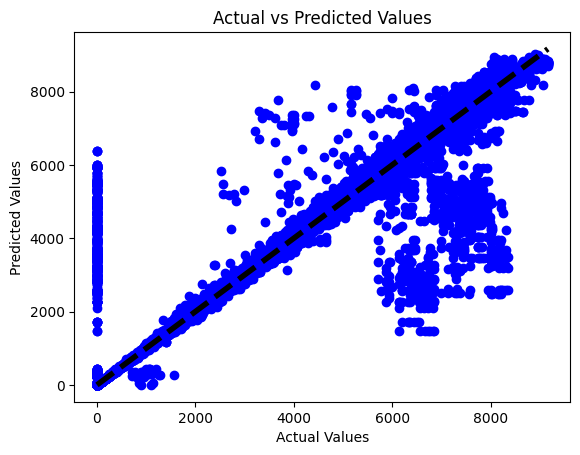

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, yhat2, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

Results aren't bad. We will try to make them better by dividing the data into bins, to feed balanced data based on time-period to the model

In [45]:
#No. of bins
cut_blocks = [1,2,3,4,5,6,7,8]
#Bins range
cut_bins =[0, 12, 24, 36, 48, 60, 72, 84, 96]
#Assigning each row to a bin based on BLOCKS
df_plant_1_predict['BIN'] = pd.cut(df_plant_1_predict['BLOCK'], bins=cut_bins, labels = cut_blocks)
display(df_plant_1_predict)

BLOCK  DAY_OF_WEEK  HOUR  DC_POWER  AC_POWER  DAILY_YIELD  \
0          1            5     0       0.0       0.0        0.000   
1          1            5     0       0.0       0.0        0.000   
2          1            5     0       0.0       0.0        0.000   
3          1            5     0       0.0       0.0        0.000   
4          1            5     0       0.0       0.0        0.000   
...      ...          ...   ...       ...       ...          ...   
68769     96            3    23       0.0       0.0     5967.000   
68770     96            3    23       0.0       0.0     5147.625   
68771     96            3    23       0.0       0.0     5819.000   
68772     96            3    23       0.0       0.0     5817.000   
68773     96            3    23       0.0       0.0     5910.000   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  month  day  hour  \
0                25.184316           22.857507          0.0      5    5     0   
1                25.184316           22.857507          0.0      5    5     0   
2                25.184316           22.857507          0.0      5    5     0   
3                25.184316           22.857507          0.0      5    5     0   
4                25.184316           22.857507          0.0      5    5     0   
...                    ...                 ...          ...    ...  ...   ...   
68769            21.909288           20.427972          0.0      6    6    23   
68770            21.909288           20.427972          0.0      6    6    23   
68771            21.909288           20.427972          0.0      6    6    23   
68772            21.909288           20.427972          0.0      6    6    23   
68773            21.909288           20.427972          0.0      6    6    23   

       test BIN  
0         0   1  
1         0   1  
2         0   1  
3         0   1  
4         0   1  
...     ...  ..  
68769     1   8  
68770     1   8  
68771     1   8  
68772     1   8  
68773     1   8  

[68774 rows x 14 columns]

We'll be predicting only based on 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION'

In [46]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [47]:
# ANN Model ---------------------------------------------------------------------
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

def ANN_model():
    # 3 layered Neural network with 500 epochs and 4 batch size
    reg = Sequential()
    reg.add(Dense(16, input_dim = 3, activation = 'relu'))
    reg.add(Dense(8,kernel_initializer='normal', activation = 'relu'))
    reg.add(Dense(1))
    reg.compile(loss='mean_squared_error', optimizer='adam')
    return reg

ann_regressor = KerasRegressor(build_fn=ANN_model, nb_epoch=500, batch_size=4, verbose=False)

#-----------------------------------X---------------------------------------------------------
#Importing models & Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

## Pipeline for different Regression models
pipeline_lr = Pipeline([('lin_regression',LinearRegression())])
pipeline_dt = Pipeline([('dt_regression',DecisionTreeRegressor(random_state=0))])
pipeline_rf = Pipeline([('rf_regression',RandomForestRegressor(random_state=0))])
pipeline_ridge = Pipeline([('ridge_regression',Ridge(random_state=0))])
pipeline_lasso = Pipeline([('lasso_regression',Lasso(random_state=0))])
pipeline_xgboost = Pipeline([('xgboost_regression',XGBRegressor())])
# pipeline_ann = Pipeline([('ann_regressor',ann_regressor)])

## Making a list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_ridge, pipeline_lasso, pipeline_xgboost
            #  , pipeline_ann
             ]

best_rmse = 100.0
best_regressor = 0
best_pipeline = ""

## Dictionary of Pipelines and Regressor types for ease of reference
pipe_dict = {0:'Linear Regression',1: 'Decision Tree Regressor',2:'Random Forest Regressor',
             3:'Ridge Regressor',4:'Lasso Regressor',5:'XG Boost Regressor',6:'ANN Regressor'}


<ipython-input-47-074d3766b77e>:15: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [58]:
train = df_plant_1_predict
test = df_plant_1_predict[['DAILY_YIELD','test']]

In [59]:

X_train = train.query('test == 0')
X_test = train.query('test == 1')
y_train = test.query('test == 0')
y_test = test.query('test == 1')
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
X_train = X_train.drop(['test'], axis=1)
X_test = X_test.drop(['test'], axis=1)
y_train = y_train.drop(['test'], axis=1)
y_test = y_test.drop(['test'], axis=1)

Train (62482, 14) (62482, 2)
Test (6292, 14) (6292, 2)


In [60]:
X_train.columns

Index(['BLOCK', 'DAY_OF_WEEK', 'HOUR', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'month',
       'day', 'hour', 'BIN'],
      dtype='object')

In [61]:
import warnings
warnings.filterwarnings("ignore")

# features to be used for training
useful_features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

from sklearn.model_selection import StratifiedKFold
# Splitting data into 8 folds
skf = StratifiedKFold(n_splits=8, random_state=23, shuffle=True)
#Initializing kfold column
X_train['kfold'] = -1
# each row shall be assigned a fold no.based on 8 bins so that each fold will have equal representation of each bin
for fold,(train_indices, valid_indices) in enumerate(skf.split(X=X_train.iloc[:,:-1], y=X_train['BIN'])):
    X_train.loc[valid_indices, 'kfold'] = fold

# Will iterate through all the Pipelines one by one
for j, model in enumerate(pipelines):

    RMSE = list()
    for i in range(8):
        xtrain = X_train[X_train['kfold'] != i]
        xvalid = X_train[X_train['kfold'] == i]

        ytrain = xtrain.DAILY_YIELD
        yvalid = xvalid.DAILY_YIELD

        xtrain = xtrain[useful_features]
        xvalid = xvalid[useful_features]

        scaler = StandardScaler()
        scaler.fit_transform(xtrain)
        scaler.transform(xvalid)

        model.fit(xtrain, ytrain)
        rmse = np.sqrt(mean_squared_error(yvalid, model.predict(xvalid)))
        RMSE.append(rmse)

    # Mean of RMSE for all iterations for each model
    folds_mean_rmse = np.mean(RMSE)

    print('Mean Validation RMSE for {}: {}'.format(pipe_dict[j], folds_mean_rmse))

   # If mean of RMSE for all iterations reduces, call that model as the best & keep repeating
    # to get the best model
    if folds_mean_rmse < best_rmse:
        best_rmse = folds_mean_rmse
        best_pipeline = model
        best_regressor = j


Mean Validation RMSE for Linear Regression: 2460.2525756295395
Mean Validation RMSE for Decision Tree Regressor: 905.0149617334071
Mean Validation RMSE for Random Forest Regressor: 905.4880664595611
Mean Validation RMSE for Ridge Regressor: 2460.2524261104763
Mean Validation RMSE for Lasso Regressor: 2460.2251615377854
Mean Validation RMSE for XG Boost Regressor: 1263.653793212836


In [64]:
#Splitting train into x & y
train = df_plant_1_predict[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION', 'test']]
test = df_plant_1_predict[['DAILY_YIELD','test']]


X_train = train.query('test == 0')
X_test = train.query('test == 1')
y_train = test.query('test == 0')
y_test = test.query('test == 1')
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
X_train = X_train.drop(['test'], axis=1)
X_test = X_test.drop(['test'], axis=1)
y_train = y_train.drop(['test'], axis=1)
y_test = y_test.drop(['test'], axis=1)

# Random grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['friedman_mse']}

from sklearn.tree import DecisionTreeRegressor
rf = DecisionTreeRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

rf_model = DecisionTreeRegressor( min_samples_split= 14, min_samples_leaf= 8,
                                max_features= 'auto', max_depth= 10, criterion= 'friedman_mse')
# Fitting on train set
y_rf = rf_model.fit(X_train, y_train)

Train (62482, 4) (62482, 2)
Test (6292, 4) (6292, 2)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'friedman_mse'}


In [65]:

#Predicting for x_test
y_pred_rf = rf_model.predict(X_test)

print(f'Root Mean Squared Error for Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}')


Root Mean Squared Error for Test Data: 2656.5143600181073


Plotting the Results

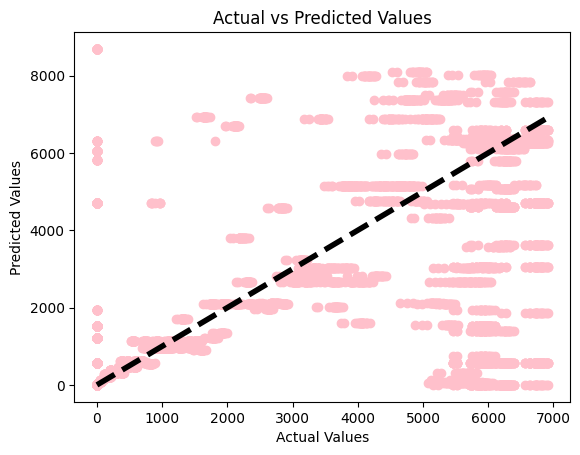

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, color='pink')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()